In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tweepy
import requests
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Gathering Data
## 1st Reading the 'Twitter archive CSV' file

In [2]:
# using pd.read to read the twitter archive file which was manually downloaded
tw_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## 2nd Downloaded programmatically the image - prediction tsv using requests library

In [14]:
# using requests library to get URL or the image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [15]:
# Opening the img-prediction file in wb mode
with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [17]:
# using pd.read to read the image-predictions.tsv with tabs separator 
img_pred= pd.read_csv('image-predictions.tsv', sep= '\t')
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# 3rd file twitter API
## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
### These are hidden to comply with Twitter's API terms and conditions


In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [21]:
# reading tweet-json file line by line 
df_list=[]

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_id = json.loads(line)  
        df_list.append(tweet_id)

In [24]:
#creating a DataFrame for the tweet json file of columns (id, retweet_count, favorite_count)
api_df=pd.DataFrame(df_list)
api_df= api_df[['id', 'retweet_count', 'favorite_count']]
api_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing Data 
## Visual & Programmatic assessment:
## 1-assessing  the twitter archive file

In [3]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
tw_archive.query('rating_denominator > 10').count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

In [7]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
tw_archive.rating_denominator.nunique()

18

In [9]:
tw_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [188]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
tw_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Cora           1
Rodney         1
Pilot          1
Scruffers      1
Sojourner      1
Name: name, Length: 957, dtype: int64

In [12]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
tw_archive[tw_archive.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

## 2-assessing image_prediction file

In [189]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [183]:
img_pred.duplicated().sum()

0

## 3- assessing twitter API file

In [25]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
api_df.duplicated().sum()

0

In [27]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Assessment Notes
### Quality issues:
#### Twitter csv
- Timestamp column should be a Datetime type.
- Tweet id 835246439529840640  has Rating denominator has value of zero should be 10 , and a rating numerator of 960 should be 13
- Remove retweets from the file that have no image in the image prediction file
- Dropping Un-necessary 6 columns in analysis(source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
- Dog names columns have missing values and incorrect Names e.g ( a )
- Missing values (None) in dog “stage” columns should be nan
#### Image Prediction file:
- Remove retweets from file
- P1 & P1_config columns should be indicative (p1 dog breeds the algorithm's #1 prediction for the image in the tweet, p1_conf is how confident the algorithm is in its #1 prediction)
#### Twitter API file :
- Change column name ‘id’ into ‘tweet_id’ for merging purpose

### Tidiness issues

- twitter API file can be merged with twitter archive file 
- Dog "stage" columns (i.e. doggo, floofer, pupper, and puppo) could be in One column in the twitter archive file.



# Making copies of the original files

In [114]:
# make copies of original files
tw_archive_clean = tw_archive.copy()
img_pred_clean = img_pred.copy()
api_df_clean = api_df.copy()

# Cleaning Data

#### Fixing 'timestamp' column should be a Datetime type

In [115]:
#using to_datetime to change timestamp column
tw_archive_clean['timestamp'] = pd.to_datetime(tw_archive_clean['timestamp'])

In [116]:
#Test
tw_archive_clean.timestamp.dtype

datetime64[ns, UTC]

#### Tweet id 835246439529840640  has rating denominator has value of zero should be 10 , and a rating numerator of 960 should be 13

#### Code

In [117]:
# first changing denominator value to 10
tw_archive_clean.loc[(tw_archive_clean.rating_denominator == 0)] = 10

#### Test

In [118]:
# Test
tw_archive_clean.rating_denominator.value_counts()

10     2334
50        3
11        3
80        2
20        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

In [119]:
# second changing numerator value to 13
tw_archive_clean.loc[(tw_archive_clean.rating_denominator == 960)] = 13

In [120]:
# Test
tw_archive_clean.rating_denominator.value_counts()

10     2334
50        3
11        3
80        2
20        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

#### Remove retweets from the file that have no image in the image prediction file

#### Code

In [121]:
#removing tweet ids without images
cond = tw_archive_clean['tweet_id'].isin(img_pred_clean['tweet_id'])
tw_archive_clean.drop(tw_archive_clean[~cond].index, inplace = True)

In [122]:
#test
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

#### Filtering all retweets and keeping original ratings that have images are to be included in the wrangling process

#### Code

In [123]:
# Filter all rows for which 'retweeted_status_id' & 'in_reply_to_status_id' is not null
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean['retweeted_status_id'] .notnull()].index, inplace = True) 
tw_archive_clean.drop(tw_archive_clean[tw_archive_clean['in_reply_to_status_id'] .notnull()].index, inplace = True)

In [124]:
# Test
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

#### Dropping Un-necessary 6 columns in analysis(source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [125]:
# Dropping unnecessary columns
tw_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id',
                       'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace=True)

In [126]:
# Test
tw_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Remove retweets from file img_pred_clean

#### Code

In [127]:
#removing retweets from img pred.
cond_2 = img_pred_clean['tweet_id'].isin(tw_archive_clean['tweet_id'])
img_pred_clean.drop(img_pred_clean[~cond_2].index, inplace = True)

In [128]:
#Test
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


#### Dog "stage" columns (i.e. doggo, floofer, pupper, and puppo) in the tw_archive file, could be in One column

#### Code

In [129]:
#  using a for loop to replace all the 'None' values in the columns ('doggo','pupper','floofer','puppo')before str.cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        tw_archive_clean[i] = tw_archive_clean[i].replace('None', '')

In [130]:
# using str.cat to combine the 4 dog stage columns
tw_archive_clean['stage'] = tw_archive_clean.doggo.str.cat(tw_archive_clean.floofer)
.str.cat(tw_archive_clean.pupper).str.cat(tw_archive_clean.puppo)

# drop the four old stage columns
tw_archive_clean = tw_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty values
tw_archive_clean['stage'] = tw_archive_clean['stage'].replace('', np.nan)

#### Test

In [133]:
# Test
tw_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


#### Dog names columns have missing values and incorrect Names e.g ( a )

#### Code

In [134]:
# replacing 'a' values in name columns with None
tw_archive_clean['name'] = tw_archive_clean['name'].replace('a', np.nan) 

In [135]:
# Test
tw_archive_clean.name.value_counts()

None        524
Charlie      11
Lucy         10
Oliver       10
Cooper       10
           ... 
Dietrich      1
Chuq          1
Opie          1
Klein         1
Bobb          1
Name: name, Length: 934, dtype: int64

#### Change column name ‘id’ into ‘tweet_id’ for merging purpose

#### Code

In [136]:
# Rename column ‘id’ into ‘tweet_id’ for merging purpose in the df_api file
api_df_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)

In [137]:
# Test
api_df_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


#### Merging twitter API file with twitter archive file 

#### Code

In [138]:
# Joining tw_archive_clean with api_df_clean
twitter_master = pd.merge(tw_archive_clean, 
                      api_df_clean, 
                      how = 'left', on = ['tweet_id'])

In [140]:
# Test
twitter_master.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
693,752660715232722944,2016-07-12 00:27:52+00:00,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo,1794,4878
1339,681320187870711809,2015-12-28 03:46:05+00:00,This is Glacier. He's a very happy pup. Loves ...,https://twitter.com/dog_rates/status/681320187...,11,10,Glacier,NaN,863,2918
1273,685268753634967552,2016-01-08 01:16:17+00:00,This is Hubertson. He's a Carmel Haberdashery....,https://twitter.com/dog_rates/status/685268753...,10,10,Hubertson,pupper,1371,3419
193,844223788422217728,2017-03-21 16:26:50+00:00,This is Margo. She just dug pup a massive hole...,https://twitter.com/dog_rates/status/844223788...,12,10,Margo,NaN,2450,14753
1519,674774481756377088,2015-12-10 02:15:47+00:00,This is Superpup. His head isn't proportional ...,https://twitter.com/dog_rates/status/674774481...,11,10,Superpup,pupper,532,1213


### Image prediction File

#### P1 & P1_config columns should be indicative (p1 dog breeds the algorithm's #1 prediction for the image in the tweet, p1_conf is how confident the algorithm is in its #1 prediction)

#### Code

In [141]:
# Renaming some columns in the img_pred_clean to be describtive
img_pred_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'is_dog1',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'is_dog2',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'is_dog3'}, inplace = True)

In [142]:
# Test 
img_pred_clean.head(1)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,is_dog1,second_prediction,second_confidence,is_dog2,third_prediction,third_confidence,is_dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# Storing the Clean Data

In [144]:
#Store the cleaned DataFrame in a CSV file
twitter_master.to_csv('twitter_archive_master.csv',index=False)
img_pred_clean.to_csv('img_pred_master.csv',index=False)

# Analyzing and Visualizing Data¶


In [165]:
# Making a copy of the cleaned data for visualization
tw_viz = twitter_master.copy()
img_viz= img_pred_clean.copy()


In [166]:
# Merging the two tables (twitter viz, img pred viz) 
tw_img_viz = pd.merge(tw_viz, 
                      img_viz, 
                      how = 'left', on = ['tweet_id'])

In [167]:
# Test
tw_img_viz

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,first_prediction,first_confidence,is_dog1,second_prediction,second_confidence,is_dog2,third_prediction,third_confidence,is_dog3
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,41,111,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147,311,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1969,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Most Popular Dog Breeds

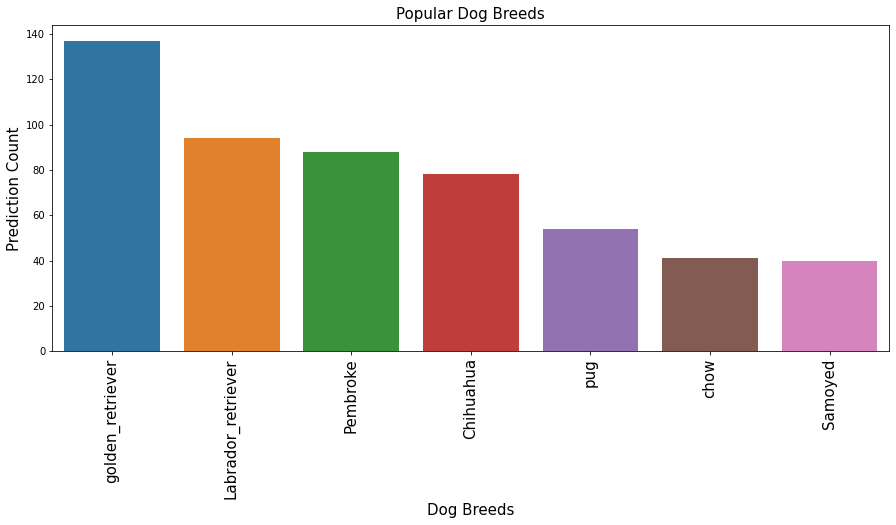

In [190]:
# using a bar plot for 7 most popular dog breeds
plt.figure(figsize = (15,6))
df1 = sb.barplot(x = tw_img_viz['first_prediction'].value_counts()[0:7].index,
            y =tw_img_viz['first_prediction'].value_counts()[0:7],
            data = tw_img_viz);
df1.set_xticklabels(df1.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 15);
plt.ylabel("Prediction Count",fontsize = 15);
plt.title("Popular Dog Breeds",fontsize = 15);

In [170]:
tw_img_viz.first_prediction.value_counts().head(10)

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: first_prediction, dtype: int64

#### Interaction with dog Breeds using retweet_count & favorite_count

In [171]:
# Sorting values of retweets 
tw_img_viz.sort_values(['retweet_count'], ascending= 0)[0:3]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,first_prediction,first_confidence,is_dog1,second_prediction,second_confidence,is_dog2,third_prediction,third_confidence,is_dog3
769,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
397,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,56625,107015,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
804,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52360,75163,...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True


In [172]:
# Sorting values of favorite count 
tw_img_viz.sort_values(['favorite_count'], ascending= 0)[0:3]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,first_prediction,first_confidence,is_dog1,second_prediction,second_confidence,is_dog2,third_prediction,third_confidence,is_dog3
306,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
769,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
58,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,45849,107956,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


<Figure size 1152x1152 with 0 Axes>

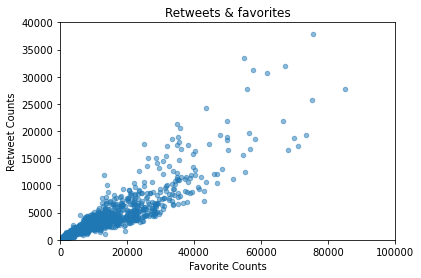

In [187]:
# plotting favorite_count and retweet_count
plt.figure(figsize=(16,16))
tw_img_viz.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Retweets & favorites');

#### Most tweeted stages of dogs

In [178]:
# Getting value_counts for the stage Column
dog_stage = tw_img_viz['stage'].value_counts()
dog_stage

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

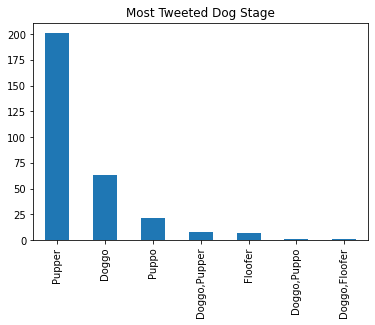

In [181]:
#plotting most tweeted dog stages
x = np.arange(7)
dog_stage.plot(kind = 'bar', title = 'Most Tweeted Dog Stage')
plt.xticks(x, ('Pupper', 'Doggo', 'Puppo', 'Doggo,Pupper', 'Floofer', 'Doggo,Puppo', 'Doggo,Floofer'));